# Исследование продаж компьютерных игр  

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

Необходимо проделать следующее:
- подготовить данные к анализу, обработав пропуски и приведя данные в удобный для работы вид
- определить актуальный период для анализа
- оценить влияние платформ, жанров, оценок пользователей и возрастного рейтинга на успешность игры
- оценить портрет пользователя отдельного региона

In [1]:
# импорт библиотек
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats as st

### Работа с файлом

In [2]:
df = pd.read_csv('/datasets/games.csv') # чтение файла 

In [3]:
df.head() # просмотр первых 5 строчек датафрейма

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Значение столбцов:**
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [4]:
df.info() # вывод основной информации датафрейма

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Подготовка данных

#### Замена названия столбцов

In [5]:
df.columns = df.columns.str.lower() # приведение названий столбцов к нижнему регистру

In [6]:
# приведение категориальных столбцов к нижнему регистру

df['platform'] = df['platform'].str.lower()
df['genre'] = df['genre'].str.lower()

#### Обработка пропусков

In [7]:
# вывод информации о доли пропусков в столбцах
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

В столбцах `name`, `genre` и `year_of_release` допустимо удалить строки с пропусками, потому что их доля мала. Причиной пропусков могла быть невнимательность при вводе данных. 

In [8]:
# удаление строк с пропусками
df = df.dropna(subset = ['name', 'genre', 'year_of_release'])

In [9]:
# проверка результата 
df.info()
df.isna().mean()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.401666
rating             0.405984
dtype: float64

In [10]:
df.duplicated().sum() # поиск дубликатов

0

In [11]:
# просмотр данных столбца user_score
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.5       2
1.3       2
1.5       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Столбец `user_score` содержит в данных аббревиатуру `tbd`, что предположительно означает  `To Be Determined`, то есть "Будет определено". Можно предположить, что данное значение имеет новая игра, которая еще не получила оценку пользователей. Следовательно, можно заменить данное значение на NaN, потому что на момент обработки данных оценки не было.

In [12]:
df['user_score'] = df['user_score'].replace('tbd', 'NaN')

Причинами пропусков в столбцах `critic_score`, `user_score` и `rating` может быть невыставленная оценка или её отсутствие вовсе. Пропуски будут оставлены без изменений.

#### Преобразование данных в нужный тип

Тип данных в столбце `year_of_release` заменим на тип данных `int`, потому что столбец содержит целые числа. 

In [13]:
df['year_of_release'] = df['year_of_release'].astype('int')
df['critic_score'] = df['critic_score'].astype('float')
df['user_score'] = df['user_score'].astype('float')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### Суммарные продажи по всех регионах

In [15]:
# запись результата сложения столбцов с продажами в отдельный столбец

df['general_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [16]:
# просмотр результата
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,Wii Sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [17]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  general_sales    16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Можно предположить, что пропуски в столбце `rating` случайны и заменить их на категорию "неизвестный рейтинг".

In [18]:
df['rating'] = df['rating'].fillna(value='unknown')

Рейтинг `K-A` с 1998 года заменён на рейтинг `E`, переименуем.

In [19]:
#df['rating'] = df['rating'].replace('K-A', 'E') # переименование категории

In [20]:
# собственная функция для категоризации 
def rating(category):
    row = ['EC','RP','AO','K-A']
    if category in row:
        return 'other'
    return category

# создание нового столбца с вызовом собственной функции
df['rating_category'] = (df['rating'].apply(rating))

In [21]:
df['rating_category'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
other        13
Name: rating_category, dtype: int64

### Исследовательский анализ данных

#### Оценка выпуска игр в разные годы

Text(0.5, 0, 'Годы релизов')

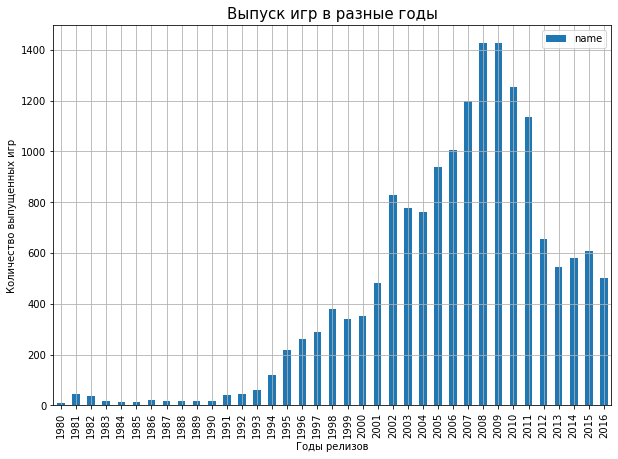

In [22]:
(
    df.pivot_table(index = 'year_of_release', values = 'name',  aggfunc = 'count')
    .plot(kind = 'bar', grid = True, figsize = (10,7))
)
plt.title('Выпуск игр в разные годы', fontsize=15)
plt.ylabel('Количество выпущенных игр', fontsize=10)
plt.xlabel('Годы релизов', fontsize=10)

Значительные показатели наблюдаются в период с 2002 по 2011 год. В этот период заметен пик выпуска игр. 

#### Анализ продаж по платформам

Text(0.5, 0, 'Платформа')

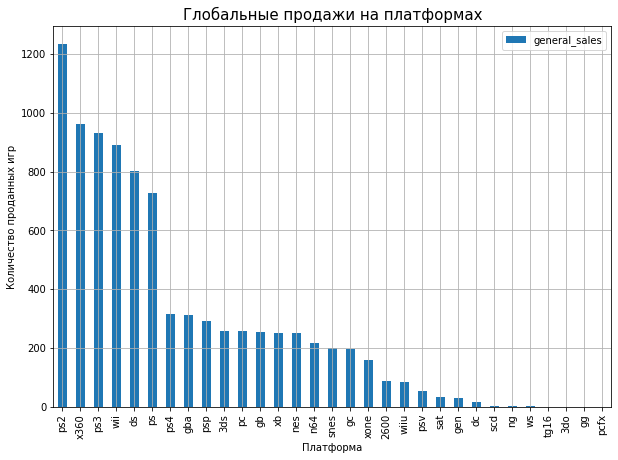

In [23]:
(
    df.groupby(['platform']).agg({'general_sales':'sum'})
    .sort_values(by = 'general_sales', ascending=False)
    .plot(kind = 'bar', grid = True, figsize = (10,7))
)
plt.title('Глобальные продажи на платформах', fontsize=15)
plt.ylabel('Количество проданных игр', fontsize=10)
plt.xlabel('Платформа', fontsize=10)

Лидерами в продажах являются платформы: `PS2`,`X360`,`PS3`,`Wii`,`DS`,`PS`.

Text(0.5, 0, 'Год')

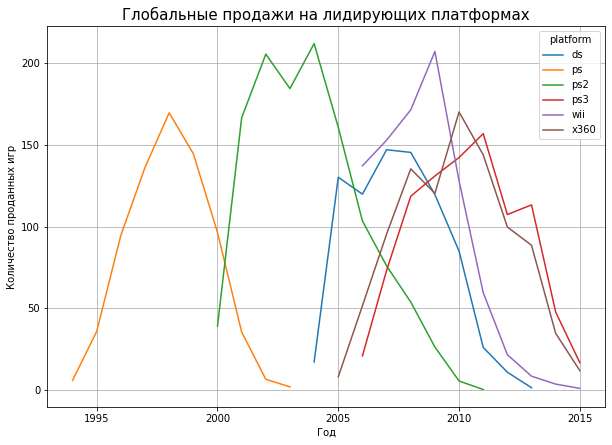

In [24]:
top_platform = ['ps2','x360','ps3','wii','ds','ps']
(
    df.query('(platform == @top_platform) and (1990 < year_of_release < 2016)')
    .pivot_table(index = 'year_of_release',  columns = 'platform', values = 'general_sales', aggfunc = 'sum')
    .plot(grid = True, figsize = (10,7))
)
plt.title('Глобальные продажи на лидирующих платформах', fontsize=15)
plt.ylabel('Количество проданных игр', fontsize=10)
plt.xlabel('Год', fontsize=10)
#.groupby(['platform', 'year_of_release']).agg({'general_sales':'sum'})

#### Актуальный период

Актуальный период для анализа с 2013 по 2016 год.

In [25]:
# срез данных за актуальный период
current_period =  df.query('2013 <= year_of_release <= 2016')
current_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales,rating_category
16,Grand Theft Auto V,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,M
23,Grand Theft Auto V,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,M
31,Call of Duty: Black Ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63,unknown
33,Pokemon X/Pokemon Y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60,unknown
42,Grand Theft Auto V,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01,unknown
16707,Aiyoku no Eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01,unknown
16710,Samurai Warriors: Sanada Maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01,unknown
16712,Haitaka no Psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01,unknown


#### Прибыльные платформы за актуальный период

Text(0.5, 0, 'Платформа')

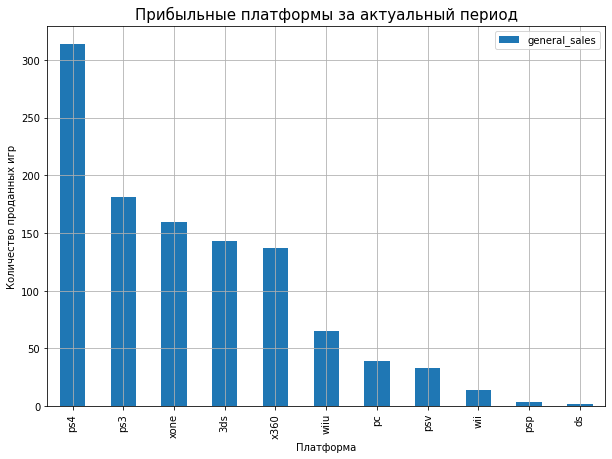

In [26]:
(
    current_period.groupby('platform').agg({'general_sales':'sum'})
    .sort_values(by = 'general_sales', ascending=False)
    .plot(kind = 'bar', grid = True, figsize = (10,7))
)

plt.title('Прибыльные платформы за актуальный период', fontsize=15)
plt.ylabel('Количество проданных игр', fontsize=10)
plt.xlabel('Платформа', fontsize=10)

Потенциально прибыльные платформы: `PS4`,`PS3`,`XOne`,`3DS`,`X360`. Однако платформа `PS4` лидирует с большой разницей.

#### Анализ глобальных продаж игр в разбивке по платформам за актуальный период

Text(0.5, 0, 'Платформа')

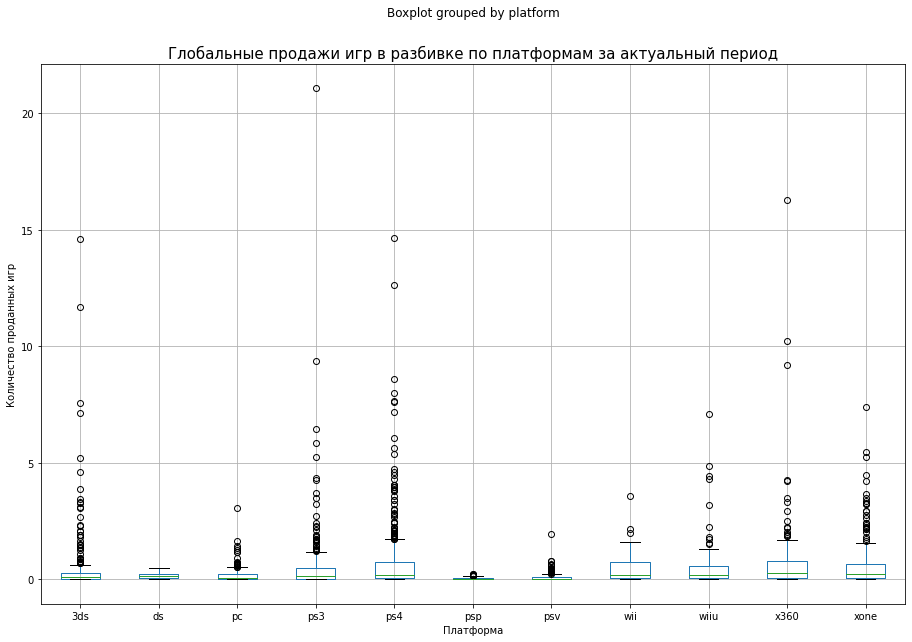

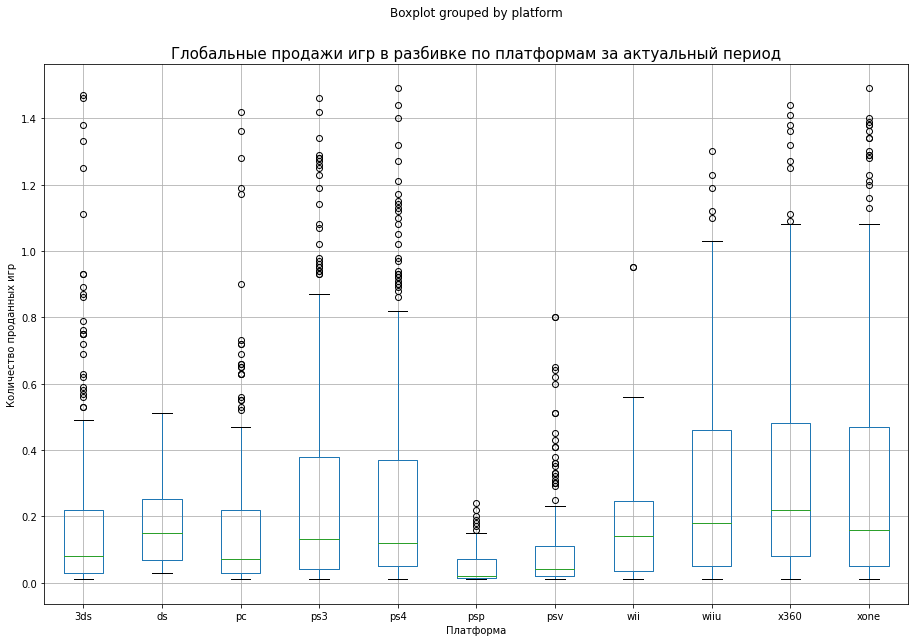

In [27]:
(
    current_period.boxplot(by = 'platform', column = 'general_sales', figsize = (15, 10))
)
plt.title('Глобальные продажи игр в разбивке по платформам за актуальный период', fontsize=15)
plt.ylabel('Количество проданных игр', fontsize=10)
plt.xlabel('Платформа', fontsize=10)
(
    current_period.query('(general_sales < 1.5)')
    .boxplot(by = 'platform', column = 'general_sales', figsize = (15, 10))
)
plt.title('Глобальные продажи игр в разбивке по платформам за актуальный период', fontsize=15)
plt.ylabel('Количество проданных игр', fontsize=10)
plt.xlabel('Платформа', fontsize=10)

Платформа `X360`является лидером глобальных продаж, затем следуют платформы `XOne`,`Wiiu`,`PS3` и `PS4`, а платформа `PSP` имеет самые маленькие продажи.

#### Влияние отзывов пользователей и критиков на продажи 

<AxesSubplot:title={'center':'Отзывы пользователей'}, xlabel='user_score', ylabel='general_sales'>

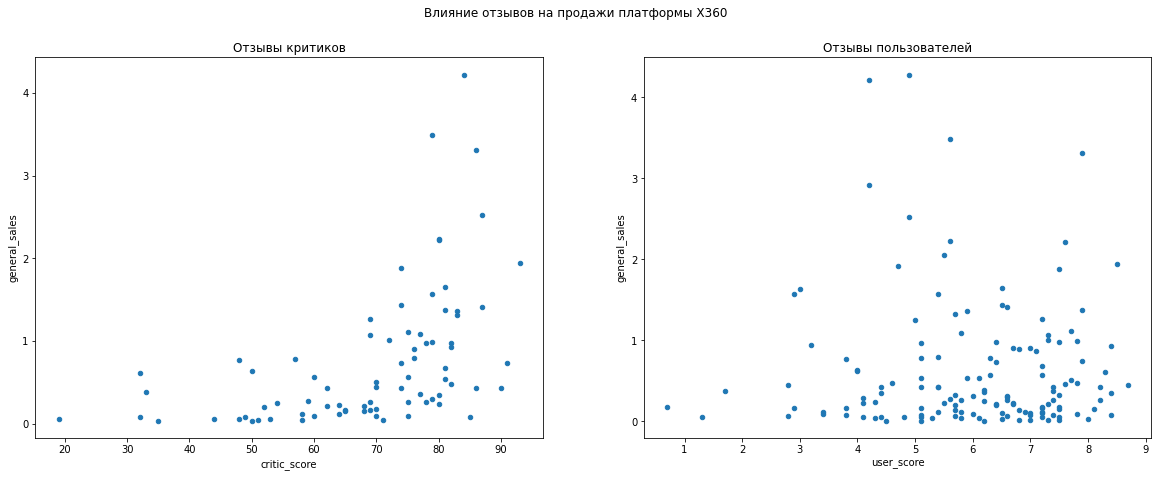

In [28]:
fig, ax = plt.subplots(1,2, figsize = (20,7))
fig.suptitle('Влияние отзывов на продажи платформы X360')

ax_1 = (
    current_period.query('(platform == "x360") and (general_sales < 6)')
)
ax_1.plot(title = 'Отзывы критиков', x = 'critic_score', y = 'general_sales', kind = 'scatter', ax = ax[0])

ax_2 = (
    current_period.query('platform == "x360" and (general_sales < 6)')
)
ax_2.plot(title = 'Отзывы пользователей', x = 'user_score', y = 'general_sales', kind = 'scatter',  ax = ax[1])


In [29]:
x360_corr_critic = current_period.query('(platform == "x360") and (general_sales < 6)')

display(x360_corr_critic['critic_score'].corr(x360_corr_critic['general_sales']))

x360_corr_user = current_period.query('platform == "x360" and (general_sales < 6)')

x360_corr_user['user_score'].corr(x360_corr_user['general_sales'])

0.4778576592386055

-0.02793207534800613

Корреляция между отзывами и продажами очень мала, можно сделать вывод: влияние отзывов на продажи незначительное.
Аналогичная ситуация просматривается на остальных платформах.

<AxesSubplot:title={'center':'Отзывы пользователей'}, xlabel='user_score', ylabel='general_sales'>

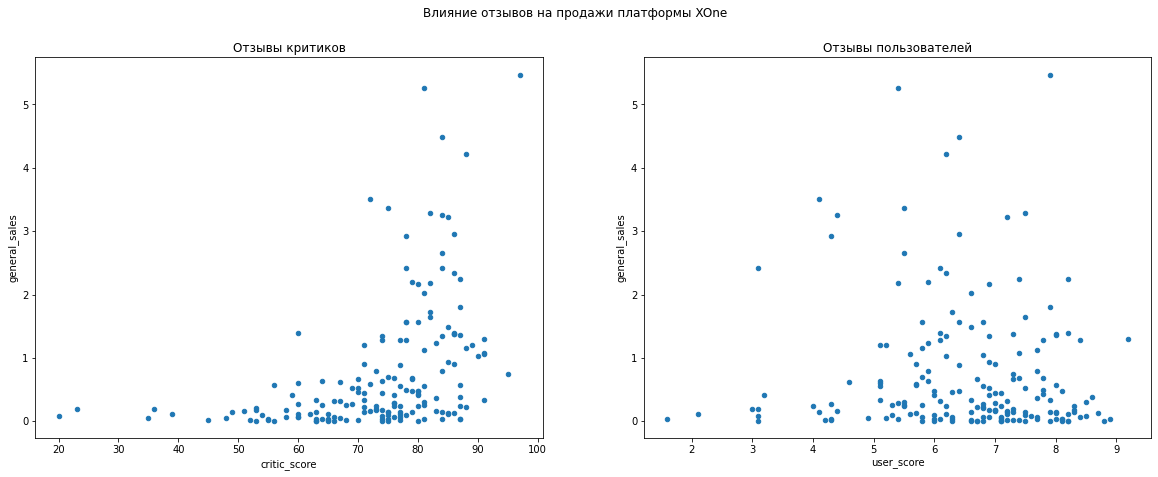

In [30]:
fig, ax = plt.subplots(1,2, figsize = (20,7))
fig.suptitle('Влияние отзывов на продажи платформы XOne')

ax_1 = (
    current_period.query('(platform == "xone") and (general_sales < 6)')
)
ax_1.plot(title = 'Отзывы критиков', x = 'critic_score', y = 'general_sales', kind = 'scatter', ax = ax[0])

ax_2 = (
    current_period.query('platform == "xone" and (general_sales < 6)')
)
ax_2.plot(title = 'Отзывы пользователей', x = 'user_score', y = 'general_sales', kind = 'scatter',  ax = ax[1])


In [31]:
xone_corr_critic = current_period.query('(platform == "xone") and (general_sales < 6)')

display(xone_corr_critic['critic_score'].corr(xone_corr_critic['general_sales']))

xone_corr_user = current_period.query('platform == "xone" and (general_sales < 6)')

xone_corr_user['user_score'].corr(xone_corr_user['general_sales'])

0.4169983280084017

-0.06892505328279414

<AxesSubplot:title={'center':'Отзывы пользователей'}, xlabel='user_score', ylabel='general_sales'>

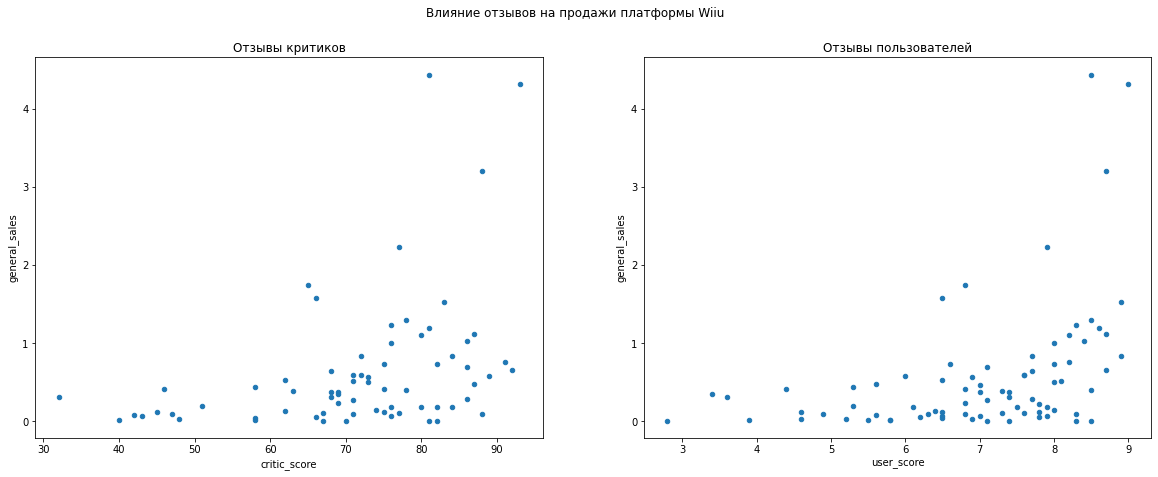

In [32]:
fig, ax = plt.subplots(1,2, figsize = (20,7))
fig.suptitle('Влияние отзывов на продажи платформы Wiiu')

ax_1 = (
    current_period.query('(platform == "wiiu") and (general_sales < 6)')
)
ax_1.plot(title = 'Отзывы критиков', x = 'critic_score', y = 'general_sales', kind = 'scatter', ax = ax[0])

ax_2 = (
    current_period.query('platform == "wiiu" and (general_sales < 6)')
)
ax_2.plot(title = 'Отзывы пользователей', x = 'user_score', y = 'general_sales', kind = 'scatter',  ax = ax[1])

In [33]:
wiiu_corr_critic = current_period.query('(platform == "wiiu") and (general_sales < 6)')

display(wiiu_corr_critic['critic_score'].corr(wiiu_corr_critic['general_sales']))

wiiu_corr_user = current_period.query('platform == "wiiu" and (general_sales < 6)')

wiiu_corr_user['user_score'].corr(wiiu_corr_user['general_sales'])

0.38049363349482873

0.4172140378976032

<AxesSubplot:title={'center':'Отзывы пользователей'}, xlabel='user_score', ylabel='general_sales'>

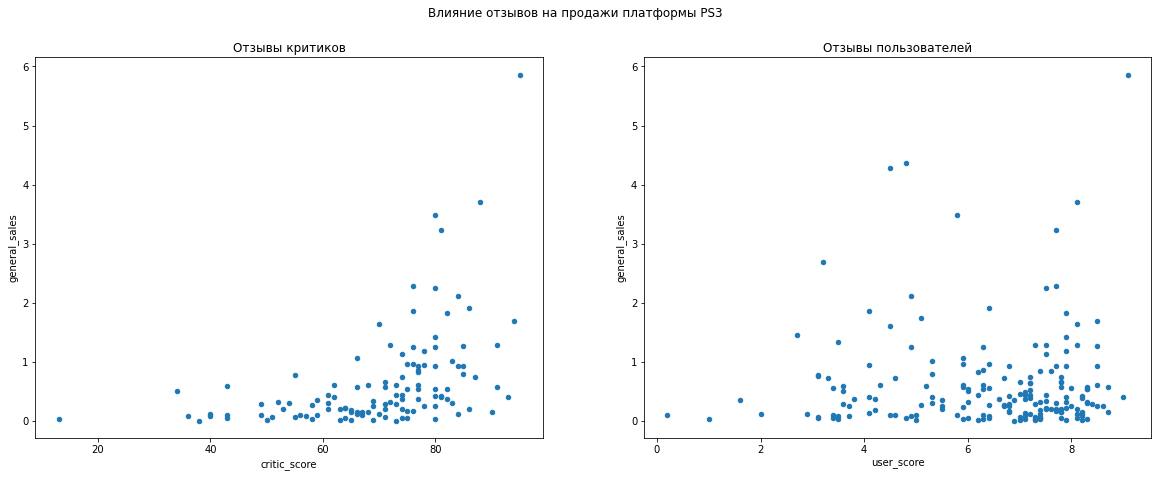

In [34]:
fig, ax = plt.subplots(1,2, figsize = (20,7))
fig.suptitle('Влияние отзывов на продажи платформы PS3')

ax_1 = (
    current_period.query('(platform == "ps3") and (general_sales < 6)')
)
ax_1.plot(title = 'Отзывы критиков', x = 'critic_score', y = 'general_sales', kind = 'scatter', ax = ax[0])

ax_2 = (
    current_period.query('platform == "ps3" and (general_sales < 6)')
)
ax_2.plot(title = 'Отзывы пользователей', x = 'user_score', y = 'general_sales', kind = 'scatter',  ax = ax[1])

In [35]:
ps3_corr_critic = current_period.query('(platform == "ps3") and (general_sales < 6)')

display(ps3_corr_critic['critic_score'].corr(ps3_corr_critic['general_sales']))

ps3_corr_user = current_period.query('platform == "ps3" and (general_sales < 6)')

ps3_corr_user['user_score'].corr(ps3_corr_user['general_sales'])

0.4522919994702584

0.030707272753280477

<AxesSubplot:title={'center':'Отзывы пользователей'}, xlabel='user_score', ylabel='general_sales'>

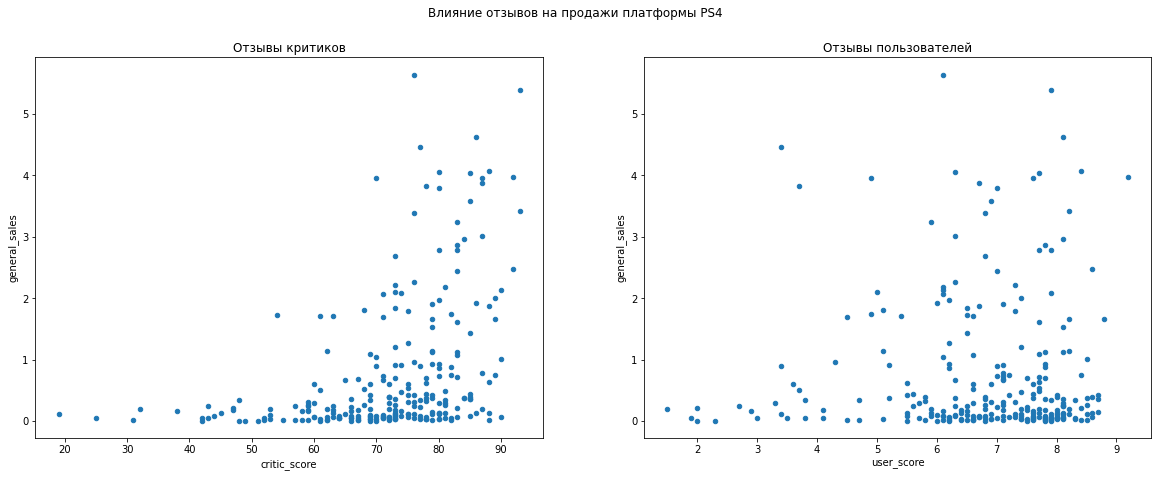

In [36]:
fig, ax = plt.subplots(1,2, figsize = (20,7))
fig.suptitle('Влияние отзывов на продажи платформы PS4')

ax_1 = (
    current_period.query('(platform == "ps4") and (general_sales < 6)')
)
ax_1.plot(title = 'Отзывы критиков', x = 'critic_score', y = 'general_sales', kind = 'scatter', ax = ax[0])

ax_2 = (
    current_period.query('platform == "ps4" and (general_sales < 6)')
)
ax_2.plot(title = 'Отзывы пользователей', x = 'user_score', y = 'general_sales', kind = 'scatter',  ax = ax[1])

In [37]:
ps_four_corr_critic = current_period.query('(platform == "ps4") and (general_sales < 6)')

display(ps_four_corr_critic['critic_score'].corr(ps_four_corr_critic['general_sales']))

ps_four_corr_user = current_period.query('platform == "ps4" and (general_sales < 6)')

ps_four_corr_user['user_score'].corr(ps_four_corr_user['general_sales'])

0.40469259244296246

0.018301740249559405

#### Распределение игр по жанрам

Text(0.5, 0, 'Жанр')

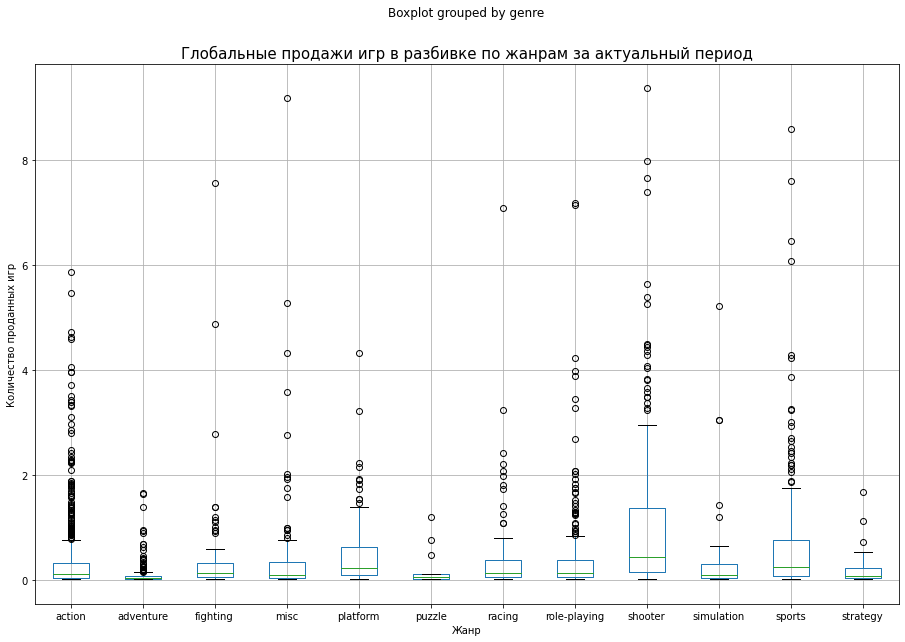

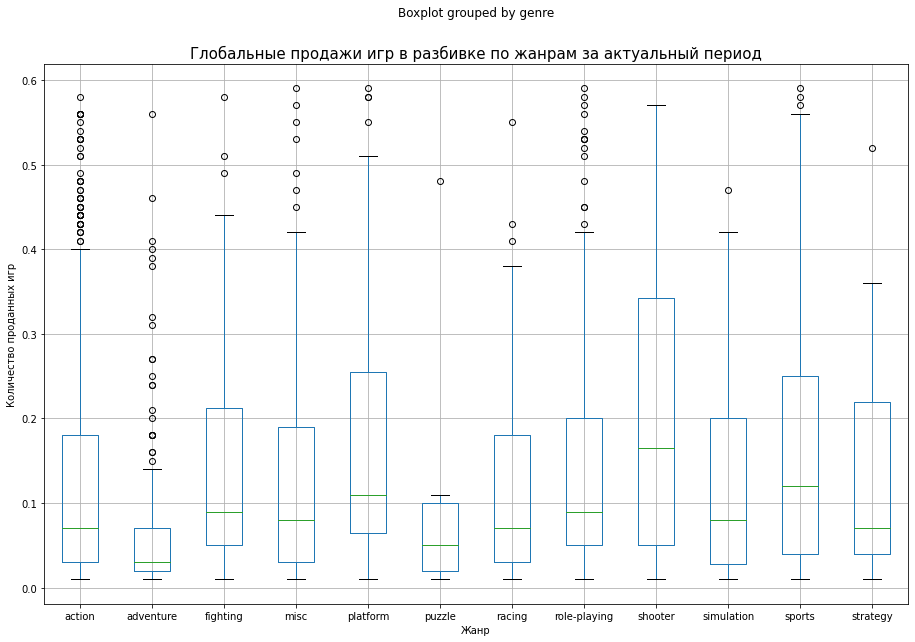

In [38]:
(
    current_period.query('general_sales < 10')
    .boxplot(by = 'genre', column = 'general_sales', figsize = (15, 10))
)
plt.title('Глобальные продажи игр в разбивке по жанрам за актуальный период', fontsize=15)
plt.ylabel('Количество проданных игр', fontsize=10)
plt.xlabel('Жанр', fontsize=10)

(
    current_period.query('general_sales < 0.6')
    .boxplot(by = 'genre', column = 'general_sales', figsize = (15, 10))
)
plt.title('Глобальные продажи игр в разбивке по жанрам за актуальный период', fontsize=15)
plt.ylabel('Количество проданных игр', fontsize=10)
plt.xlabel('Жанр', fontsize=10)

Большие продажи имеют жанры `Shooter`, `Sports` и `Platform`. 

Самые низкие продажи имеет жанр `Adventure` и `Puzzle`. 

### Оценка портрета пользователя каждого региона

#### Самые популярные платформы отдельного региона

<AxesSubplot:title={'center':'Япония'}, xlabel='Платформа', ylabel='Количество проданных игр'>

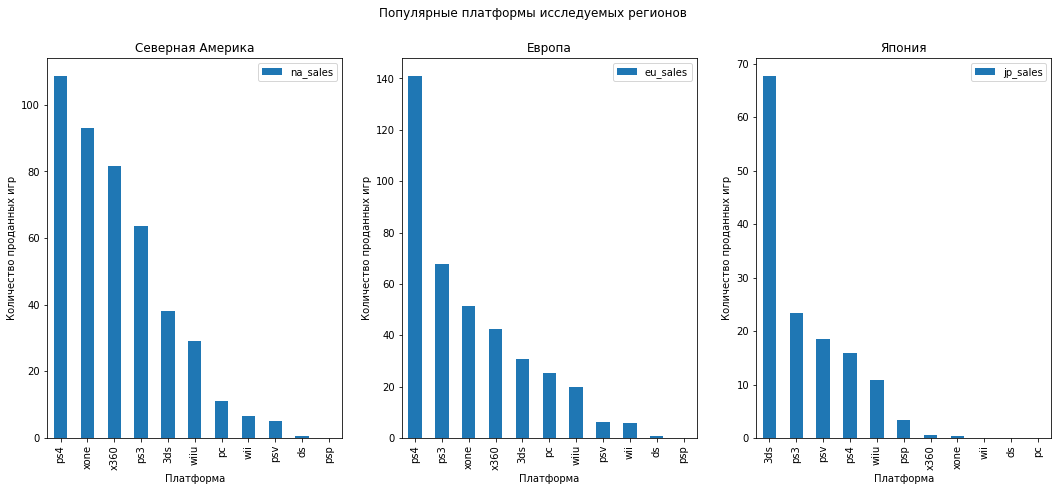

In [39]:
fig, ax = plt.subplots(1,3, figsize = (18,7))
fig.suptitle('Популярные платформы исследуемых регионов')

ax_1 = (
    current_period.groupby(['platform']).agg({'na_sales':'sum'})
    .sort_values(by = 'na_sales', ascending=False)
)
ax_1.plot(title = 'Северная Америка', xlabel = 'Платформа', ylabel = 'Количество проданных игр', kind = 'bar', ax = ax[0])


ax_2 = (
    current_period.groupby(['platform']).agg({'eu_sales':'sum'})
    .sort_values(by = 'eu_sales', ascending=False)
)
ax_2.plot(title = 'Европа', xlabel = 'Платформа', ylabel = 'Количество проданных игр', kind = 'bar', ax = ax[1])

ax_3 = (
    current_period.groupby(['platform']).agg({'jp_sales':'sum'})
    .sort_values(by = 'jp_sales', ascending=False)
)
ax_3.plot(title = 'Япония', xlabel = 'Платформа', ylabel = 'Количество проданных игр', kind = 'bar', ax = ax[2])

В Северной Америке (NA) популярными являются платформы: `PS4`,`XOne`,`X360`,`PS3`,`3DS`(топ-5). (перечисление в порядке убывания продаж)

В Европе (EU) популярными являются платформы: `PS4`,`PS3`,`XOne`,`X360`,`3DS`(топ-5).(перечисление в порядке убывания продаж) 

В Японии (JP) популярными платформами являются: `3DS`,`PS3`,`PSV`,`PS4`,`Wiiu`(топ-5). (перечисление в порядке убывания продаж)

Самые большие продажи из представленных регионов наблюдаются в Северной Америке, самые маленькие - в Японии.

#### Самые популярные жанры отдельного региона

<AxesSubplot:title={'center':'Япония'}, xlabel='Жанр', ylabel='Количество проданных игр'>

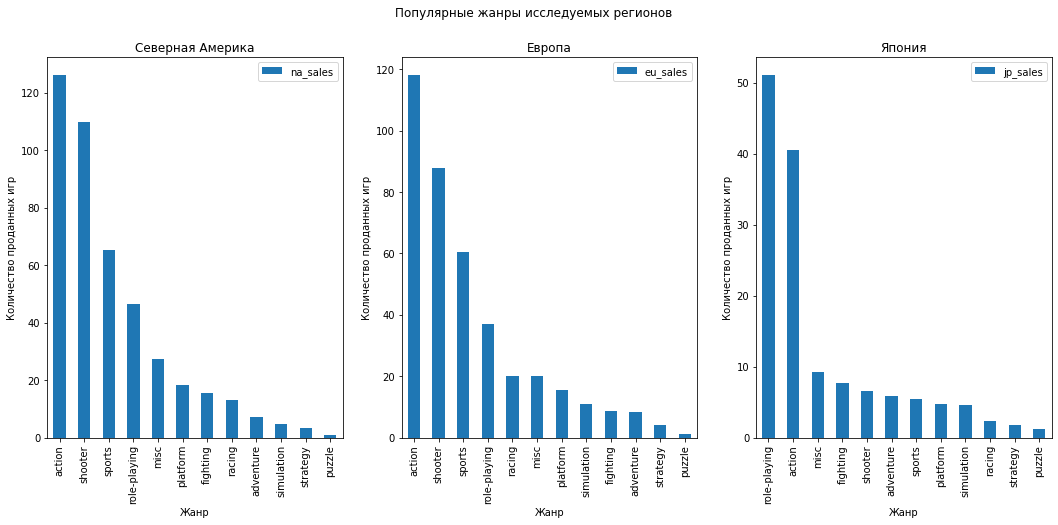

In [40]:
fig, ax = plt.subplots(1,3, figsize = (18,7))
fig.suptitle('Популярные жанры исследуемых регионов')

ax_1 = (
    current_period.groupby(['genre']).agg({'na_sales':'sum'})
    .sort_values(by = 'na_sales', ascending=False)
)
ax_1.plot(title = 'Северная Америка', xlabel = 'Жанр', ylabel = 'Количество проданных игр', kind = 'bar', ax = ax[0])

ax_2 = (
    current_period.groupby(['genre']).agg({'eu_sales':'sum'})
    .sort_values(by = 'eu_sales', ascending=False)
)
ax_2.plot(title = 'Европа', xlabel = 'Жанр', ylabel = 'Количество проданных игр', kind = 'bar', ax = ax[1])

ax_3 = (
    current_period.groupby(['genre']).agg({'jp_sales':'sum'})
    .sort_values(by = 'jp_sales', ascending=False)
)
ax_3.plot(title = 'Япония',  xlabel = 'Жанр', ylabel = 'Количество проданных игр', kind = 'bar', ax = ax[2])

В Северной Америке (NA) популярные жанры: `Action`,`Shooter`,`Sports`,`Role-Playing`,`Misc`(топ-5).

В Европе (EU) популярные жанры: `Action`,`Shooter`,`Sports`,`Role-Playing`,`Racing`(топ-5).

Продажи в Северной Америке значительно выше продаж в Европе, но рейтинг популярных жанров практически одинаковый. Жанр `Action` является самым непопулярным жанром в обоих регионах.

В Японии (JP) популярные жанры: `Role-Playing` и `Action`, разница в продажах со следующими жанрами большая. Далее `Misc`,`Fighting`,`Shooter`.

<AxesSubplot:xlabel='genre'>

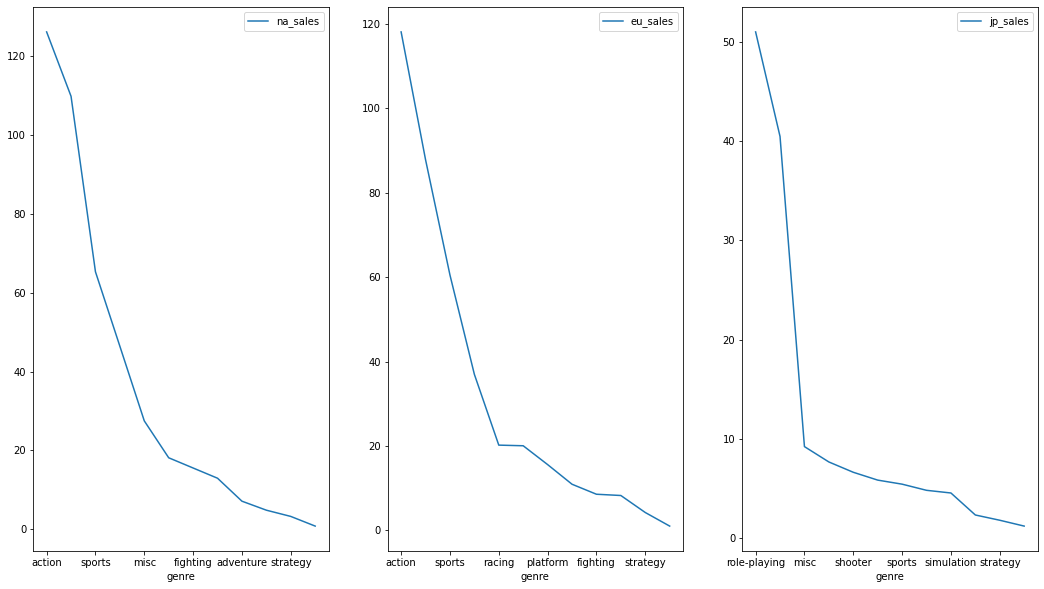

In [41]:
# check

fig, ax = plt.subplots(1,3, figsize = (18,10))

ax_1 = (
    current_period.groupby(['genre']).agg({'na_sales':'sum'})
    .sort_values(by = 'na_sales', ascending=False)
)
ax_1.plot(ax = ax[0])

ax_2 = (
    current_period.groupby(['genre']).agg({'eu_sales':'sum'})
    .sort_values(by = 'eu_sales', ascending=False)
)
ax_2.plot(ax = ax[1])

ax_3 = (
    current_period.groupby(['genre']).agg({'jp_sales':'sum'})
    .sort_values(by = 'jp_sales', ascending=False)
)
ax_3.plot(ax = ax[2])

#### Оценка влияния рейтинга ESRB на продажи в отдельном регионе

<AxesSubplot:title={'center':'Япония'}, xlabel='Рейтинг', ylabel='Количество проданных игр'>

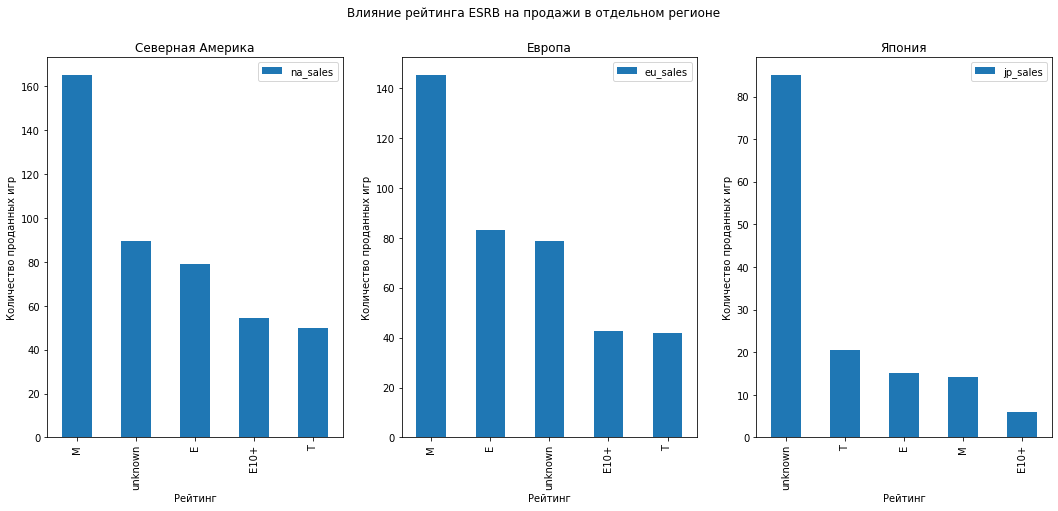

In [42]:
fig, ax = plt.subplots(1,3, figsize = (18,7))
fig.suptitle('Влияние рейтинга ESRB на продажи в отдельном регионе')

ax_1 = (
    current_period.groupby(['rating_category']).agg({'na_sales':'sum'})
    .sort_values(by = 'na_sales', ascending=False)
)
ax_1.plot(title = 'Северная Америка', xlabel = 'Рейтинг', ylabel = 'Количество проданных игр', kind = 'bar', ax = ax[0])

ax_2 = (
    current_period.groupby(['rating_category']).agg({'eu_sales':'sum'})
    .sort_values(by = 'eu_sales', ascending=False)
)
ax_2.plot(title = 'Европа', xlabel = 'Рейтинг', ylabel = 'Количество проданных игр', kind = 'bar', ax = ax[1])

ax_3 = (
    current_period.groupby(['rating_category']).agg({'jp_sales':'sum'})
    .sort_values(by = 'jp_sales', ascending=False)
)
ax_3.plot(title = 'Япония', xlabel = 'Рейтинг', ylabel = 'Количество проданных игр', kind = 'bar', ax = ax[2])

В Северной Америке (NA) самые продаваемые игры с рейтингом `M`.

В Европе (EU) самые продаваемые игры с рейтинго `M`.

В Японии (JP) из-за пропусков в данных невозможно установить рейтинг самых продаваемых игр.

В Северной Америке большое количество игр без рейтинга, далее идёт Япония, затем - Европа. Предпочтения Северной Америки и Европы схожи, Японии же отличаются.

### Проверка гипотез

```
H_0: Средний пользовательский рейтинг платформы Xbox One = средний пользовательский рейтинг платформы PC
H_a: Средний пользовательский рейтинг платформы Xbox One ≠ средний пользовательский рейтинг платформы PC
```

In [43]:
current_period = current_period.dropna(subset = ['user_score'])

In [44]:
# вызов метода для проверки гипотезы
XOne = current_period.query('platform == "xone"')['user_score']
PC =  current_period.query('platform == "pc"')['user_score']

results = st.ttest_ind(XOne, PC)

# значение уровня значимости

alpha = 0.05

# вывод значения p-value на экран 

print('p-значение:', results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Можно сделать вывод: средний пользовательский рейтинг платформы Xbox One = средний пользовательский рейтинг платформы PC.

```
H_0: Средний пользовательский рейтинг жанра Action = средний пользовательский рейтинг жанра Sports
H_a: Средний пользовательский рейтинг жанра Action ≠ средний пользовательский рейтинг жанра Sports
```

In [45]:
Action = current_period.query('genre == "action"')['user_score']
Sports =  current_period.query('genre == "sports"')['user_score']

# вызов метода для проверки гипотезы

results = st.ttest_ind(Action, Sports)

# значение уровня значимости

alpha = 0.05

# вывод значения p-value на экран 

print('p-значение:', results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Можно сделать вывод: средний пользовательский рейтинг жанра Action ≠ средний пользовательский рейтинг жанра Sports.

### Вывод

Стояла задача в выявлении `определяющих` успешность игры `закономерностей`. 

Чтобы игра была успешна во всех исследуемых регионах, необходимо:
- сделать акцент на платформы `PS4`,`PS3` и `3DS`;
- выпускать игры в жанрах `Action`,`Sports`,`Shooter`,`Role-Playing`;
- выпускать игры с возрастным рейтингом `E`, `T` и `M`.

При рассмотрении особенностей отдельных регионов (Северной Америки, Европы и Японии) замечена разница в предпочтениях. Интересы пользователей Северной Америки и Европы зачастую схожи, а с пользователями Японии - различны.

В анализе был сделан уклон на успешность игры во всех регионах для того, что было затрачено меньшее количество ресурсов на создание игры и она удовлетворяла предпочтениям бОльшей части пользователей.